In [ ]:
# !pip install pyyaml==5.4.1
!pip install sentence_transformers
# !pip install img2vec_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import scatter


import torch
import torchvision.models as models
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading images
print('Loading description...')
descriptions = np.load('/content/drive/My Drive/NFT_image_recommendation/Blockdaemon_NFT_Contracts/descriptions.npz')

# Initialized pre-trained BERT Model
model = SentenceTransformer('bert-base-nli-mean-tokens') # probably use sentence-Bert

# Description Embedding
embeddings = model.encode(descriptions, normalize_embeddings=True, show_progress_bar=True)

In [ ]:
print('Applying PCA...')
reduced_data_intermediate = PCA(n_components=50).fit_transform(embeddings)
reduced_data_final = TSNE(n_components=3, n_jobs = -1).fit_transform(reduced_data_intermediate)

kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data_final)

print('Predicting...')
preds = kmeans.predict(reduced_data_final)
labels = kmeans.labels_

print('Done!')

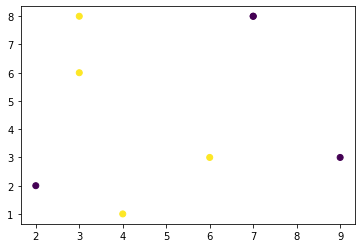

In [ ]:
# Visualization
scatter(x=reduced_data_final[:,0], y=reduced_data_final[:,1], c=labels)
